In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from qbstyles import mpl_style

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('../data/Advertising.csv')

In [5]:
data_x = data.drop('sales', axis = 1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
lin_reg = LinearRegression()

### LET'S NOW TEST DIFFERENT POLYNOMIAL DEGREES AN THEN CHOOSE THE ONE THAT MAKES THE MODEL PERFORM BETTER.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data['sales'], test_size=0.3, random_state=101)

In [40]:
errors_test = []
errors_train = []
degrees = []
for i in range(1,10):
    degrees.append(i)
    
    poly_convert = PolynomialFeatures(degree = i, include_bias=False)
    poly_data_train = poly_convert.fit_transform(X_train)
    poly_data_test = poly_convert.transform(X_test)
    
    lin_reg.fit(poly_data_train, y_train)
    
    predictions_train = lin_reg.predict(poly_data_train)
    predictions_test = lin_reg.predict(poly_data_test)
    
    errors_train.append(np.sqrt(mean_squared_error(y_train,predictions_train)))
    errors_test.append(np.sqrt(mean_squared_error(y_test,predictions_test)))
    

In [41]:
errors_train

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.35170836883993606,
 0.25093429381786897,
 0.1945666472024403,
 5.423737279770718,
 0.14168056686637134,
 0.17093527228363956]

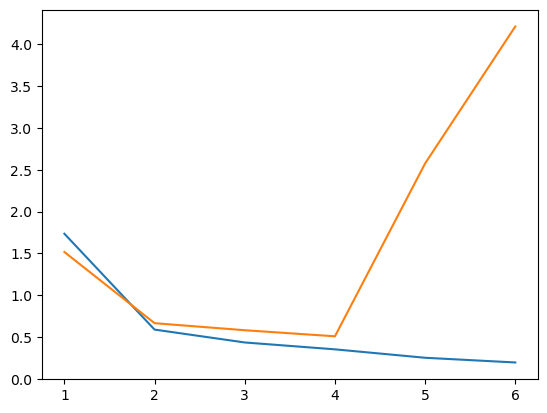

In [44]:
plt.plot(degrees[:6],errors_train[:6])
plt.plot(degrees[:6],errors_test[:6])

#### By looking at this plot we can tell that as the polynomial degree increases, the model performance improves. However, from degree 4 we can notice that the model begins to overfit. So, the best choice in this case could be the polynomial features with degree 2 or 3, since the error is relatively low and without risk of overfitting (given that the model starts overfiting with degree 5, so a good choice would be 2 or 3 despite the fact that the best performance is with degree 4)